🔄 Using OpenAI API (gpt-4o)
Iteration 0: Kp=1.240, Ti=1.100, Td=0.270, tr: 1.66s (0.00%), o: 12.11% (0.00%), ts: 5.60s (0.00%)
Iteration 1: Kp=1.360, Ti=1.210, Td=0.310, tr: 1.68s (1.05%), o: 9.17% (-24.27%), ts: 5.55s (-0.89%)
Iteration 2: Kp=1.500, Ti=1.330, Td=0.350, tr: 1.68s (1.35%), o: 6.48% (-46.45%), ts: 5.41s (-3.34%)
Iteration 3: Kp=1.650, Ti=1.460, Td=0.390, tr: 1.69s (2.11%), o: 4.07% (-66.38%), ts: 5.12s (-8.52%)
Early stop.


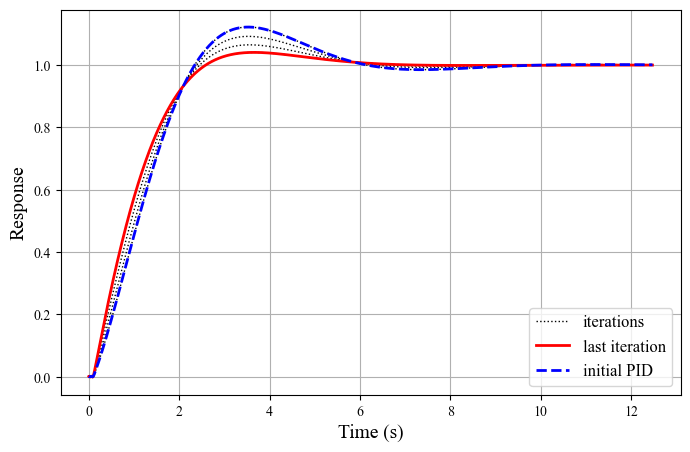

,Kp,Ti,Td,early_stop,rise_time,overshoot,settling_time,rise_time_%,overshoot_%,settling_time_%
0,1.24,1.10,0.27,False,1.66,12.11,5.60,0.00,0.00,0.00
1,1.36,1.21,0.31,False,1.68,9.17,5.55,1.05,-24.27,-0.89
2,1.50,1.33,0.35,False,1.68,6.48,5.41,1.35,-46.45,-3.34
3,1.65,1.46,0.39,True,1.69,4.07,5.12,2.11,-66.38,-8.52


In [3]:
MODEL_NAME="gpt-4o" # {gpt-4o, deepseek-v2}
MODE="balanced" # {speedup, reduce_overshoot, balanced}
AGGRESSIVNESS="moderate" # {aggressive, moderate, fine}

import control as ctrl
from pid_controller import PIDController
from main import main
from delay import delay

s = ctrl.TransferFunction.s
#G6 Process for Speedup mode
#L = 0.5
#T = 0.5
#plant = 1 / (s * (1 + T * s))*delay(L)
#pid_initial = PIDController(Kp = 0.45, Ti = 8, Td = 0.5)

#G5 Process for Reduce overshoot mode
# T = 0.1
# plant = 1 / ((1 + s) * (1 + T * s) * (1 + (T**2) * s) * (1 + (T**3) * s))
# pid_initial = PIDController(Kp = 4.29, Ti = 0.44,Td = 0.05)

#G7 Process for Balanced mode
T = 1
L= 0.1
T1=1-L
plant = T/ ((1 + T * s) * (1 + T1* s))*delay(L)
pid_initial = PIDController(Kp = 1.24, Ti = 1.1, Td = 0.27)


df=main(pid_initial=pid_initial, plant=plant, model_name=MODEL_NAME, mode=MODE, aggressiveness=AGGRESSIVNESS)
display(df)
